creating the dataset

In [1]:
import pandas as pd
import random

# Create lists for each column
customer_ids = range(1001, 1501)
ages = [random.randint(18, 65) for _ in range(500)]
genders = [random.choice(['Male', 'Female']) for _ in range(500)]
marital_statuses = [random.choice(['Married', 'Single', 'Divorced']) for _ in range(500)]
annual_incomes = [random.randint(30000, 120000) for _ in range(500)]
total_purchases = [random.randint(5, 50) for _ in range(500)]
preferred_categories = [random.choice(['Electronics', 'Appliances']) for _ in range(500)]

# Create a DataFrame from the lists
data = {
    'CustomerID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'MaritalStatus': marital_statuses,
    'AnnualIncome (USD)': annual_incomes,
    'TotalPurchases': total_purchases,
    'PreferredCategory': preferred_categories
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('TechElectro_Customer_Data.csv', index=False)


In [2]:
pip install pandas matplotlib seaborn scikit-learn

Step 1: Data Collection

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('TechElectro_Customer_Data.csv')

# Display the first few rows to verify the data
print(df.head())


   CustomerID  Age  Gender MaritalStatus  AnnualIncome (USD)  TotalPurchases  \
0        1001   40    Male      Divorced               60837              34   
1        1002   32  Female        Single               31175              40   
2        1003   53    Male      Divorced               44124              24   
3        1004   25  Female       Married               33257              13   
4        1005   20  Female        Single               79420              30   

  PreferredCategory  
0        Appliances  
1        Appliances  
2       Electronics  
3        Appliances  
4       Electronics  


Step 2: Data Cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Handle duplicates (if needed)
df = df.drop_duplicates()

# Handle missing values (if needed)
df = df.dropna()


CustomerID            0
Age                   0
Gender                0
MaritalStatus         0
AnnualIncome (USD)    0
TotalPurchases        0
PreferredCategory     0
dtype: int64
Number of duplicate rows: 0


Step 3: Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['PreferredCategory'] = label_encoder.fit_transform(df['PreferredCategory'])

# Perform feature scaling (if needed)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'AnnualIncome (USD)', 'TotalPurchases']])

# Replace the scaled features in the original dataframe
df[['Age', 'AnnualIncome (USD)', 'TotalPurchases']] = df_scaled


Step 4: Exploratory Data Analysis

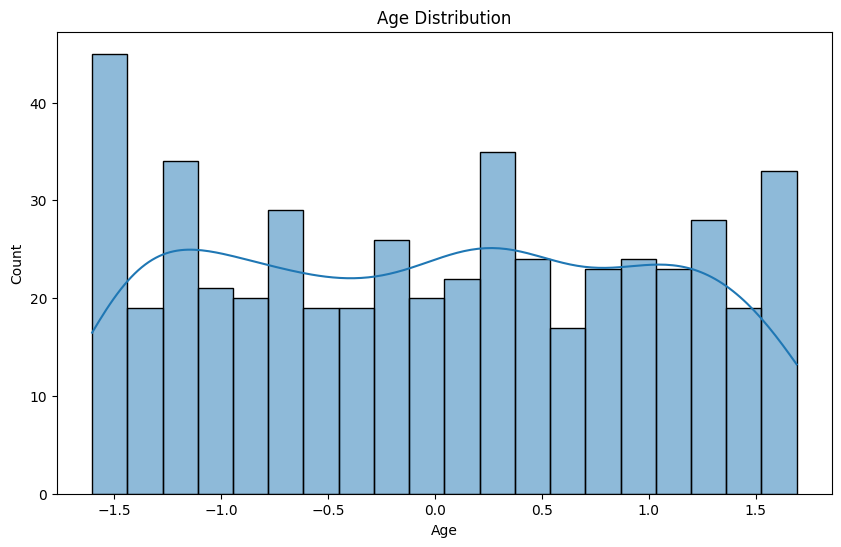

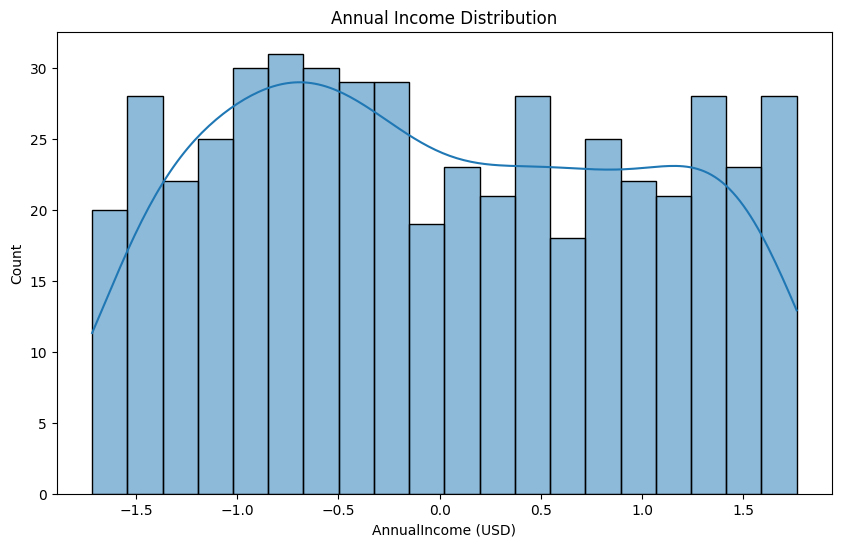

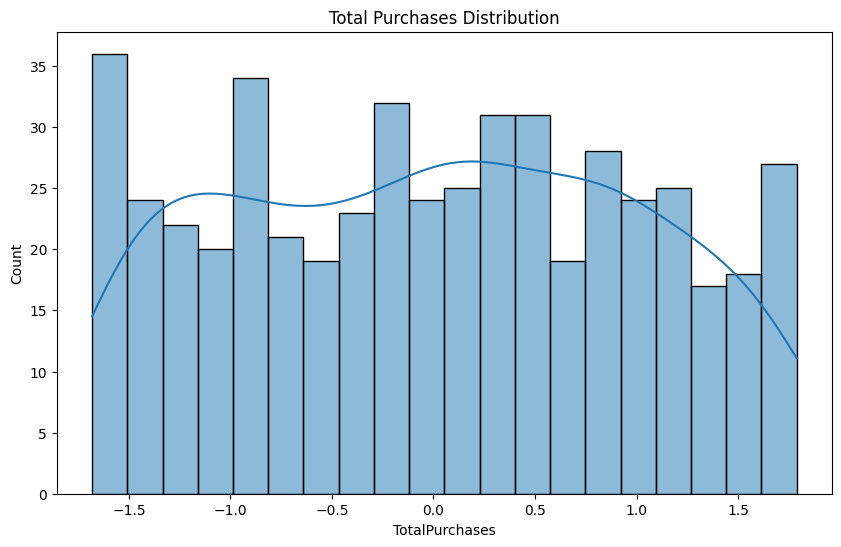

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Visualize Annual Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AnnualIncome (USD)', bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

# Visualize Total Purchases distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalPurchases', bins=20, kde=True)
plt.title('Total Purchases Distribution')
plt.show()


Step 5: Customer Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

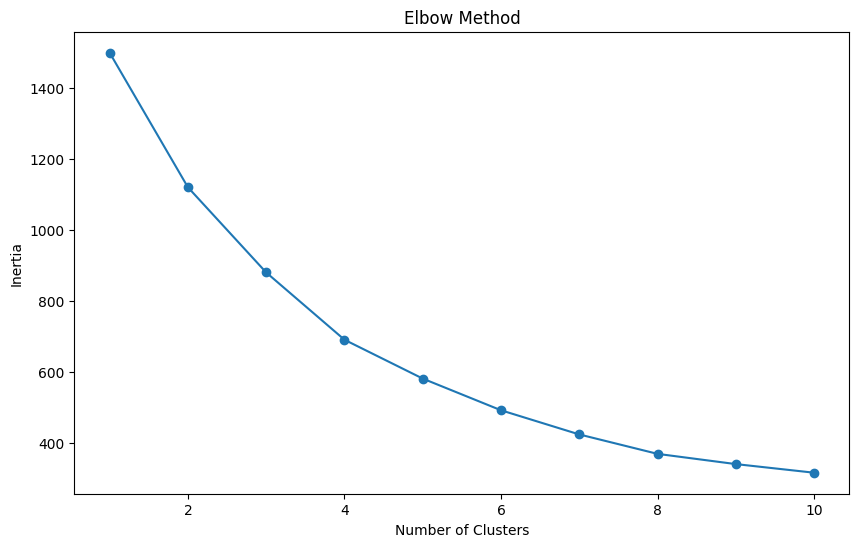

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
from sklearn.cluster import KMeans

# Select features for clustering
X = df[['Age', 'AnnualIncome (USD)', 'TotalPurchases']]

# Find optimal number of clusters using Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, choose the optimal number of clusters and fit K-means
n_clusters = 3  # Change based on elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)
